In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e2/sample_submission.csv
/kaggle/input/playground-series-s5e2/train.csv
/kaggle/input/playground-series-s5e2/test.csv
/kaggle/input/playground-series-s5e2/training_extra.csv


In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s5e2/train.csv")
test  = pd.read_csv("/kaggle/input/playground-series-s5e2/test.csv")
train_extra = pd.read_csv("/kaggle/input/playground-series-s5e2/training_extra.csv")

In [3]:
cat_dtypes = train.select_dtypes(include='object').columns
train[cat_dtypes] = train[cat_dtypes].astype('category')
test[cat_dtypes] = test[cat_dtypes].astype('category')

In [4]:
train.columns

Index(['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

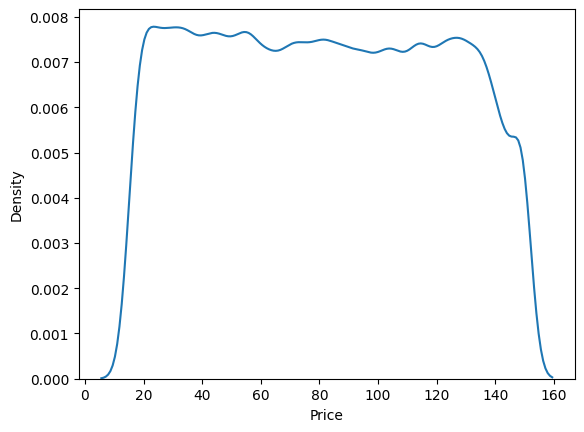

In [5]:
import seaborn as sns
sns.kdeplot(train['Price'])

In [6]:
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
y = train['Price']
X = train.drop(columns='Price')
X[cat_dtypes] = X[cat_dtypes].astype(str).fillna('missing')
X[cat_dtypes] = X[cat_dtypes].astype('category')
train_pool = cb.Pool(data=X, label=y, cat_features=X[cat_dtypes].columns.values)
model = cb.CatBoostRegressor(random_state=42, verbose=0)
model.fit(train_pool)

In [7]:
test[cat_dtypes] = test[cat_dtypes].astype(str).fillna('missing')
test[cat_dtypes] = test[cat_dtypes].astype('category')
test_pool = cb.Pool(data=test, cat_features=test[cat_dtypes].columns.values)
preds = model.predict(test)
preds

array([87.70999525, 80.70683692, 93.51630996, ..., 80.78382286,
       79.92969392, 79.07126337])

In [8]:
sample_submission = pd.read_csv("/kaggle/input/playground-series-s5e2/sample_submission.csv")
sample_submission['Price'] = preds
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(5)

,id,Price
0,300000,87.709995
1,300001,80.706837
2,300002,93.516310
3,300003,84.139777
4,300004,80.848604


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

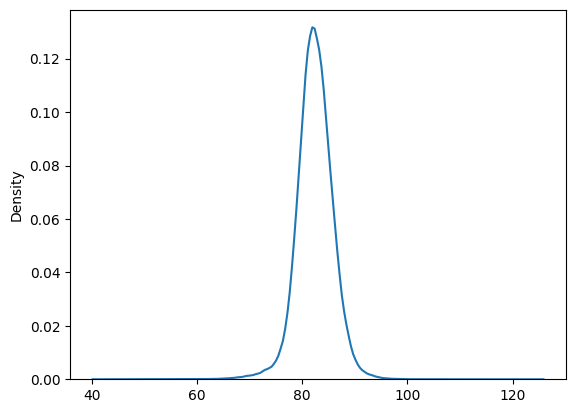

In [9]:
sns.kdeplot(preds)